In [2]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.image as mpimg
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [17]:
# функция для разделения сегментов изображения и получения статистики по ним
def reshape_N_5_denisions(arr):
    assert len(arr.shape) == 3, \
        "we need 3 dimension matrix"

    width = arr.shape[0]
    height = arr.shape[1]
    arr = np.reshape(arr, [-1, 3])
    ind = np.indices((width, height))

    dem = np.stack((np.reshape(ind[0], -1), np.reshape(ind[1], -1))).T
    arr = np.concatenate((dem, arr), axis=1)
    return arr


def get_image_segments(image_path):
    image = Image.open(image_path)

    # Image is (687 x 1025, RGB channels)
    image = np.array(image)
    original_shape = image.shape

    # Flatten image.
    X = np.reshape(image, [-1, 3])
#     X = reshape_N_5_denisions(image)

    # гиперпараметр  
    bandwidth = 20
    
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    
    
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)

    features = np.empty(4, dtype=int)
    features[0] = len(labels_unique)
    print("number of clusters : %d" % features[0])
    _clusters_ = np.zeros(len(labels_unique)+1, dtype=int)

    for i in labels:
        _clusters_[i]+=1
    
    features[1] = np.amax(_clusters_)
    print("max area : %d" % features[1])
    features[2] = np.median(_clusters_)
    print("median area : %d" % features[2])
    print(len(_clusters_) * 15 // 100)
    print(np.argsort(_clusters_))
    print(_clusters_[np.argsort(_clusters_)[:len(_clusters_) * 15 // 100]])
    features[3] = np.sum(_clusters_[np.argsort(_clusters_)[:len(_clusters_) * 15 // 100]])
    print("area of 10 percent's smallest segments : %d" % features[0])
    
    

    for i, n in enumerate(sorted(_clusters_, reverse=True)[:min(10,_clusters_.shape[0])]):
        print("cluster {}: area {}".format(i, n))
    
    

    # отбрасываем RGB
    segmented_image = np.reshape(labels, original_shape[:2])    
    plt.figure(figsize=(50,100))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.axis('off')
    return features


number of clusters : 9
max area : 72583
median area : 23237
1
[9 8 7 6 5 4 3 2 1 0]
[0]
area of 10 percent's smallest segments : 9
cluster 0: area 72583
cluster 1: area 47456
cluster 2: area 28971
cluster 3: area 28963
cluster 4: area 26470
cluster 5: area 20004
cluster 6: area 5709
cluster 7: area 150
cluster 8: area 94
cluster 9: area 0


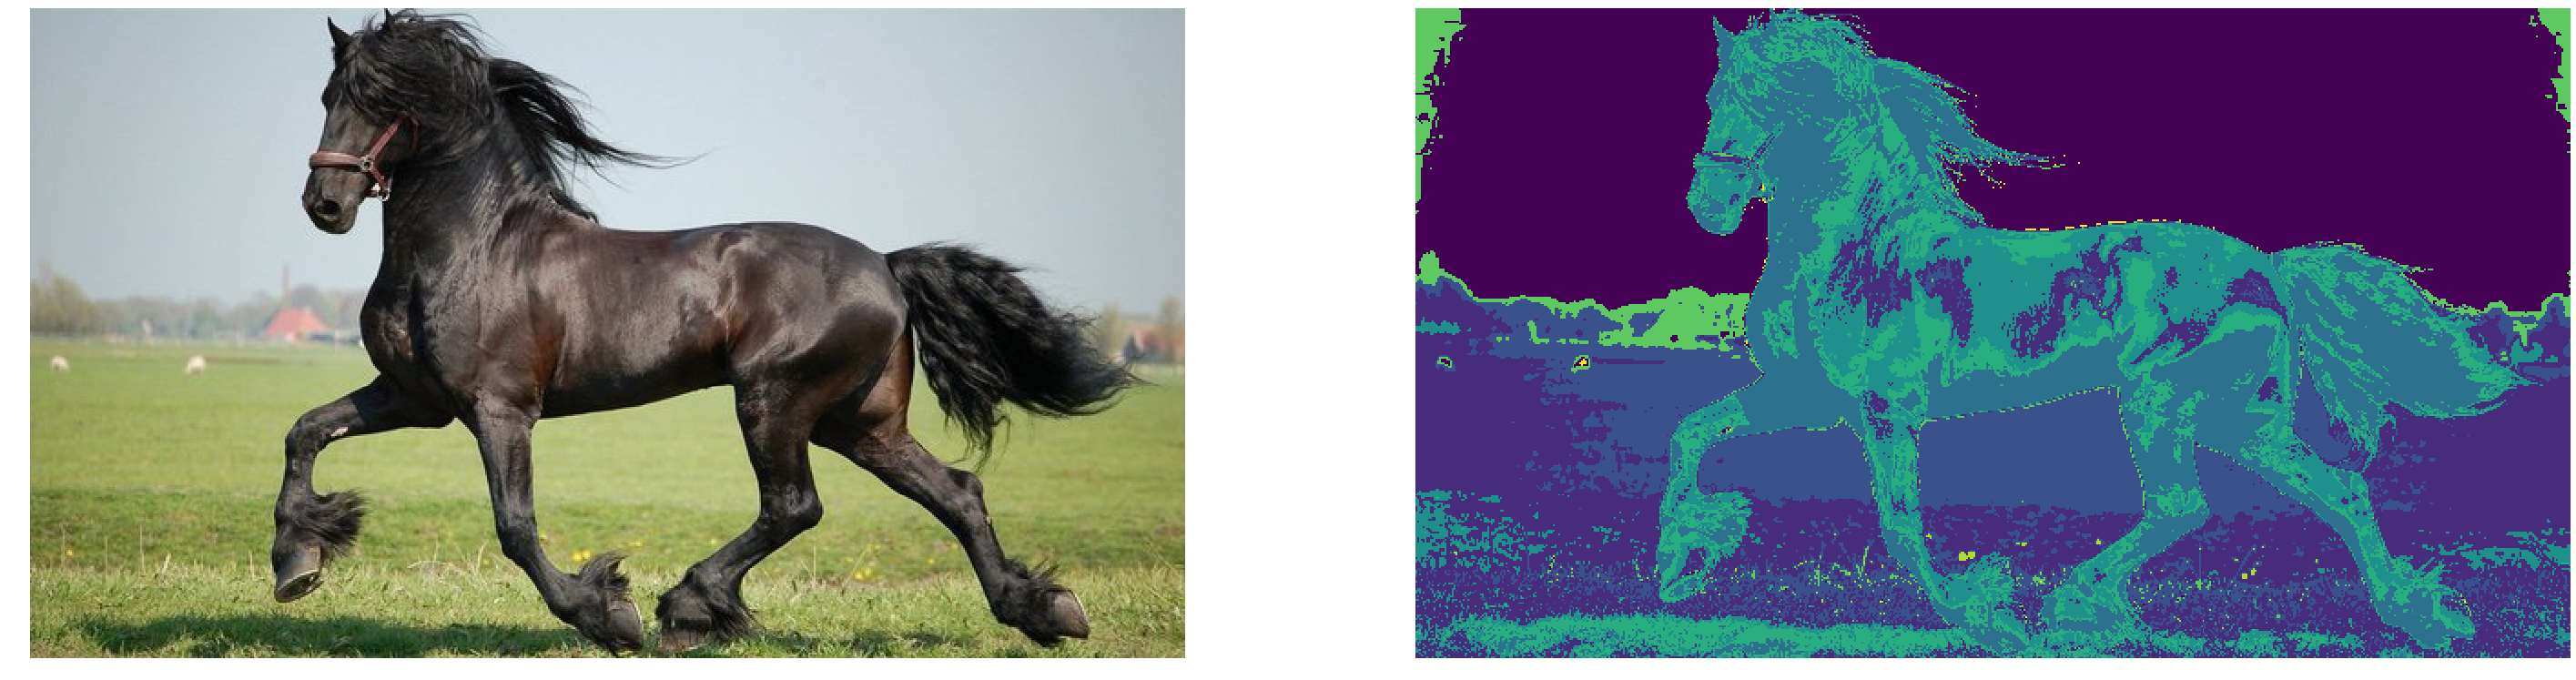

In [18]:
f = get_image_segments( "images/horse_640x360.jpg")

In [14]:
features = np.array([f])
print(features)

[[    9 72583 23237     0]]


In [9]:
f = get_image_segments("images/town_640x360.jpg")

KeyboardInterrupt: 

In [ ]:
f = get_image_segments("images/t_640x360.jpg")